<a href="https://colab.research.google.com/github/Brandon-Bernal-Alarcon/Notas/blob/main/Machine%20Learning/Aprendizaje%20Supervisado/05_Regresi%C3%B3n_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión lineal

La regresión lineal es uno de los modelos supervisados más simples y fundamentales, asume que la relación entre las variables de entrada y la variable objetivo puede aproximarse mediante una combinación lineal de las características.

El modelo aprende dos tipos de parámetros:

Coeficientes (w) que miden la contribución de cada característica

Intercepto (b) es el valor base de la predicción cuando las entradas son cero

Una vez entrenado, el modelo produce predicciones estables y fáciles de interpretar, La predicción 𝑦 se obtiene como una combinación lineal de las entradas

## **Regresión lineal en un dataset sintético (1 característica)**

In [4]:
from sklearn.linear_model import LinearRegression
%matplotlib notebook
%matplotlib inline

from sklearn import neighbors
import numpy
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_regression
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [45.70870465]
linear model intercept (b): 148.446
R-squared score (training): 0.679
R-squared score (test): 0.492


**Mínimos cuadrados ordinarios**



El método más común para entrenar modelos de regresión lineal es la regresión lineal por mínimos cuadrados, este método busca, minimizar el error cuadrático medio (MSE), es decir, el promedio de las diferencias al cuadrado entre los valores reales y los valores predichos

Intuitivamente, cada punto de entrenamiento genera un error, el modelo óptimo es el que minimiza la suma total de esos errores cuadrados, esta cantidad también se conoce como suma de residuos al cuadrado. Esto produce una única solución óptima para los parámetros 𝑤 y 𝑏. <br>

- Los puntos representan los datos reales.

- La línea roja es la solución de mínimos cuadrados.

- El modelo captura la tendencia global lineal, sin ajustarse al ruido local.

- A diferencia de KNN, la forma del modelo no cambia localmente.

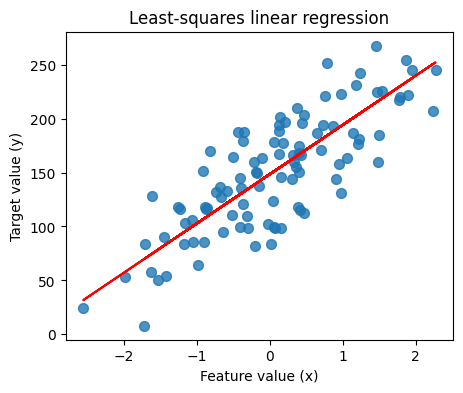

In [5]:
plt.figure(figsize=(5,4))
plt.scatter(X_R1, y_R1, marker= 'o', s=50, alpha=0.8)
plt.plot(X_R1, linreg.coef_ * X_R1 + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

**Evaluación del modelo**

Al igual que con KNN, el desempeño del modelo se evalúa usando:

El coeficiente de determinación 𝑅^2, esto permite comparar el ajuste en entrenamiento y la capacidad de generalización en prueba

In [6]:
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

R-squared score (training): 0.679
R-squared score (test): 0.492


**Comparación: regresión lineal vs KNN**

Este módulo destaca una comparación importante entre dos enfoques de regresión:

**KNN**

- Hace pocas suposiciones sobre los datos

- Se ajusta muy bien al entrenamiento

- Puede ser inestable y sensible al ruido

**Regresión lineal**

- Hace una suposición fuerte: la relación es aproximadamente lineal

- Produce predicciones más estables

- Generaliza mejor cuando esa suposición es razonable

Podemos evaluar los modelos con el mayor $R^2$, ademas un modelo más simple puede generalizar mejor si sus supuestos coinciden con la estructura real de los datos.